# Timeseries classification with a Transformer model

[Code source](https://keras.io/examples/timeseries/timeseries_classification_transformer/)<br>
**Description:** This notebook demonstrates how to do timeseries classification using a Transformer model.

## Introduction

This is the Transformer architecture from
[Attention Is All You Need](https://arxiv.org/abs/1706.03762),
applied to timeseries instead of natural language.

This example requires TensorFlow 2.4 or higher.

## Load the dataset

We are going to use the same dataset and preprocessing as the
[TimeSeries Classification from Scratch](https://keras.io/examples/timeseries/timeseries_classification_from_scratch)
example.

In [ ]:
import pandas as pd
import requests
from io import StringIO
import numpy as np
from sklearn.model_selection import train_test_split

In [ ]:
# combined data
# load processed data
train_mean = pd.read_csv('https://raw.githubusercontent.com/zxyao5148/STAT3612_2023_1A_GroupProject/main/data_processing/train/train_valid_mean_mode.csv')
train_latest = pd.read_csv('https://raw.githubusercontent.com/zxyao5148/STAT3612_2023_1A_GroupProject/main/data_processing/train/train_valid_latest.csv')
train_dispers = pd.read_csv('https://raw.githubusercontent.com/zxyao5148/STAT3612_2023_1A_GroupProject/main/data_processing/train/train_valid_entropy_std.csv')
train_min = pd.read_csv('https://raw.githubusercontent.com/zxyao5148/STAT3612_2023_1A_GroupProject/main/data_processing/train/train_valid_min.csv')
train_max = pd.read_csv('https://raw.githubusercontent.com/zxyao5148/STAT3612_2023_1A_GroupProject/main/data_processing/train/train_valid_max.csv')
train_q1 = pd.read_csv('https://raw.githubusercontent.com/zxyao5148/STAT3612_2023_1A_GroupProject/main/data_processing/train/train_valid_q1.csv')
train_q3 = pd.read_csv('https://raw.githubusercontent.com/zxyao5148/STAT3612_2023_1A_GroupProject/main/data_processing/train/train_valid_q3.csv')
train_kurtosis = pd.read_csv('https://raw.githubusercontent.com/zxyao5148/STAT3612_2023_1A_GroupProject/main/data_processing/train/train_valid_kurtosis.csv')
train_skewness = pd.read_csv('https://raw.githubusercontent.com/zxyao5148/STAT3612_2023_1A_GroupProject/main/data_processing/train/train_valid_skewness.csv')
train_range = pd.read_csv('https://raw.githubusercontent.com/zxyao5148/STAT3612_2023_1A_GroupProject/main/data_processing/train/train_valid_range.csv')
train_iqr = pd.read_csv('https://raw.githubusercontent.com/zxyao5148/STAT3612_2023_1A_GroupProject/main/data_processing/train/train_valid_iqr.csv')
train_latest = train_latest.drop(train_latest.columns[0:13], axis=1)
train_dispers = train_dispers.drop(train_dispers.columns[0:13], axis=1)
train_min = train_min.drop(train_min.columns[0:13], axis=1)
train_max = train_max.drop(train_max.columns[0:13], axis=1)
train_q1 = train_q1.drop(train_q1.columns[0:13], axis=1)
train_q3 = train_q3.drop(train_q3.columns[0:13], axis=1)
train_kurtois = train_kurtosis.drop(train_kurtosis.columns[0:13], axis=1)
train_skewness = train_skewness.drop(train_skewness.columns[0:13], axis=1)
train_range = train_range.drop(train_range.columns[0:13], axis=1)
train_iqr = train_iqr.drop(train_iqr.columns[0:13], axis=1)

# merge train_ and train_latest
train = pd.concat([train_mean, train_latest, train_dispers, train_min, train_max], axis=1)

# load processed data
test_mean = pd.read_csv('https://raw.githubusercontent.com/zxyao5148/STAT3612_2023_1A_GroupProject/main/data_processing/test/test_mean_mode.csv')
test_latest = pd.read_csv('https://raw.githubusercontent.com/zxyao5148/STAT3612_2023_1A_GroupProject/main/data_processing/test/test_latest.csv')
test_dispers = pd.read_csv('https://raw.githubusercontent.com/zxyao5148/STAT3612_2023_1A_GroupProject/main/data_processing/test/test_entropy_std.csv')
test_min = pd.read_csv('https://raw.githubusercontent.com/zxyao5148/STAT3612_2023_1A_GroupProject/main/data_processing/test/test_min.csv')
test_max = pd.read_csv('https://raw.githubusercontent.com/zxyao5148/STAT3612_2023_1A_GroupProject/main/data_processing/test/test_max.csv')
test_q1 = pd.read_csv('https://raw.githubusercontent.com/zxyao5148/STAT3612_2023_1A_GroupProject/main/data_processing/test/test_q1.csv')
test_q3 = pd.read_csv('https://raw.githubusercontent.com/zxyao5148/STAT3612_2023_1A_GroupProject/main/data_processing/test/test_q3.csv')
test_kurtosis = pd.read_csv('https://raw.githubusercontent.com/zxyao5148/STAT3612_2023_1A_GroupProject/main/data_processing/test/test_kurtosis.csv')
test_skewness = pd.read_csv('https://raw.githubusercontent.com/zxyao5148/STAT3612_2023_1A_GroupProject/main/data_processing/test/test_skewness.csv')
test_range = pd.read_csv('https://raw.githubusercontent.com/zxyao5148/STAT3612_2023_1A_GroupProject/main/data_processing/test/test_range.csv')
test_iqr = pd.read_csv('https://raw.githubusercontent.com/zxyao5148/STAT3612_2023_1A_GroupProject/main/data_processing/test/test_iqr.csv')
test_latest = test_latest.drop(test_latest.columns[0:12], axis=1)
test_dispers = test_dispers.drop(test_dispers.columns[0:12], axis=1)
test_min = test_min.drop(test_min.columns[0:12], axis=1)
test_max = test_max.drop(test_max.columns[0:12], axis=1)
test_q1 = test_q1.drop(test_q1.columns[0:12], axis=1)
test_q3 = test_q3.drop(test_q3.columns[0:12], axis=1)
test_kurtosis = test_kurtosis.drop(test_kurtosis.columns[0:12], axis=1)
test_skewness = test_skewness.drop(test_skewness.columns[0:12], axis=1)
test_range = test_range.drop(test_range.columns[0:12], axis=1)
test_iqr = test_iqr.drop(test_iqr.columns[0:12], axis=1)

# merge train_mean and train_latest
test = pd.concat([test_mean, test_latest, test_dispers, test_min, test_max], axis=1)

In [ ]:
train = train.drop(train.columns[11], axis=1)
test = test.drop(test.columns[11], axis=1)

In [ ]:
x_train = pd.concat([train.iloc[:,10], train.iloc[:,12:]], axis=1)
y_train = train.iloc[:,11]

!wget https://raw.githubusercontent.com/zxyao5148/STAT3612_2023_1A_GroupProject/main/code_base/adjust_imbl.py
from adjust_imbl import adjust_imbl
x_train, y_train = adjust_imbl(x_train, y_train)

x_test = test.iloc[:,10:]

--2023-12-05 05:05:27--  https://raw.githubusercontent.com/zxyao5148/STAT3612_2023_1A_GroupProject/main/code_base/adjust_imbl.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 927 [text/plain]
Saving to: ‘adjust_imbl.py’

adjust_imbl.py      100%[===================>]     927  --.-KB/s    in 0s      

2023-12-05 05:05:27 (44.8 MB/s) - ‘adjust_imbl.py’ saved [927/927]

Original dataset shape Counter({0: 9564, 1: 2032})
Resampled dataset shape Counter({0: 2032, 1: 2032})


In [ ]:
# standarize data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [ ]:
# Reshape the arrays
x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], 1))
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], 1))

x_train.shape

# Reset the index of the y_train DataFrame
y_train = y_train.reset_index(drop=True)

# Shuffle the indices
idx = np.random.permutation(len(x_train))

# Reassign the values using the shuffled indices
x_train = x_train[idx]
y_train = y_train.iloc[idx]

## Build the model

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

def transformer_xl_encoder(inputs, head_size, num_heads, ff_dim, dropout=0):
    # Normalization and Attention
    x = layers.LayerNormalization(epsilon=1e-4)(inputs)
    x = layers.MultiHeadAttention(
        key_dim=head_size, num_heads=num_heads, dropout=dropout
    )(x, x)
    x = layers.Dropout(dropout)(x)
    res = x + inputs

    # Feed Forward Part
    x = layers.LayerNormalization(epsilon=1e-6)(res)
    x = layers.Conv1D(filters=ff_dim, kernel_size=1, activation="relu")(x)
    x = layers.Dropout(dropout)(x)
    x = layers.Conv1D(filters=inputs.shape[-1], kernel_size=1)(x)
    return x + res

def build_model(
    input_shape,
    head_size,
    num_heads,
    ff_dim,
    num_transformer_blocks,
    mlp_units,
    dropout=0,
    mlp_dropout=0,
):
    inputs = keras.Input(shape=input_shape)
    x = inputs
    for _ in range(num_transformer_blocks):
        x = transformer_xl_encoder(x, head_size, num_heads, ff_dim, dropout)

    x = layers.GlobalAveragePooling1D(data_format="channels_first")(x)
    for dim in mlp_units:
        x = layers.Dense(dim, activation="relu")(x)
        x = layers.Dropout(mlp_dropout)(x)
    outputs = layers.Dense(n_classes, activation="softmax")(x)
    return keras.Model(inputs, outputs)

## Train

In [ ]:
from sklearn.metrics import roc_auc_score
import tensorflow as tf

# Define a custom metric function to calculate AUC
def auc(y_true, y_pred):
    auc = tf.py_function(roc_auc_score, (y_true, y_pred[:, 1]), tf.float32)
    return auc

input_shape = x_train.shape[1:]
n_classes = 2

model = build_model(
    input_shape,
    head_size=256,
    num_heads=4,
    ff_dim=4,
    num_transformer_blocks=4,
    mlp_units=[128],
    mlp_dropout=0.4,
    dropout=0.25,
)

model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer=keras.optimizers.Adam(learning_rate=1e-4),
    metrics=["sparse_categorical_accuracy",auc],
)
model.summary()

callbacks = [EarlyStopping(patience=10, restore_best_weights=True), ReduceLROnPlateau(factor=0.1, patience=5)]

history=model.fit(
    x_train,
    y_train,
    validation_split=0.2,
    epochs=200,
    batch_size=128,
    callbacks=callbacks,
)

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 467, 1)]             0         []                            
                                                                                                  
 layer_normalization (Layer  (None, 467, 1)               2         ['input_1[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 multi_head_attention (Mult  (None, 467, 1)               7169      ['layer_normalization[0][0]', 
 iHeadAttention)                                                     'layer_normalization[0][0]'] 
                                                                                              

In [ ]:
model.evaluate(x_train, y_train, verbose=1)

127/127 [==============================] - 10s 81ms/step - loss: 0.4962 - sparse_categorical_accuracy: 0.7692 - auc: 0.8311


[0.4962042570114136, 0.7691929340362549, 0.8311447501182556]

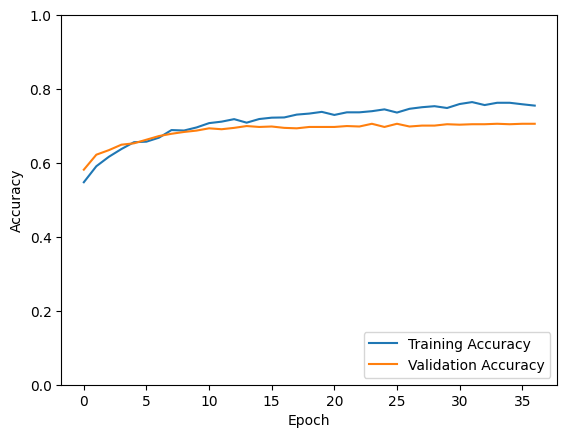

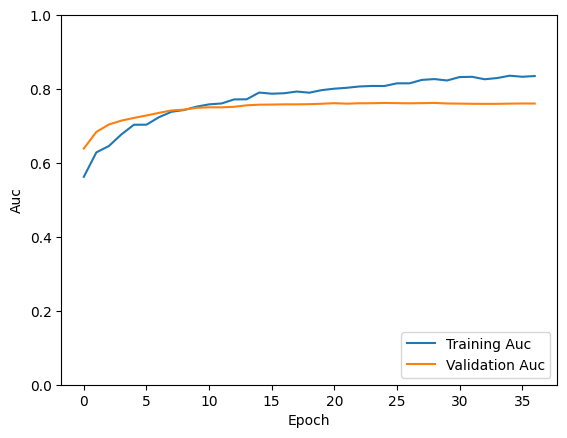

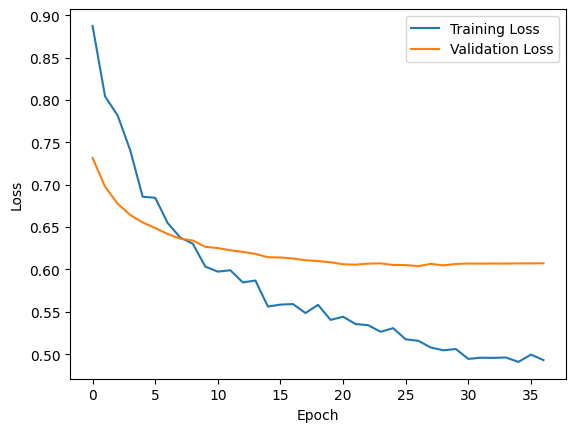

In [ ]:
import matplotlib.pyplot as plt

# Plot the training and validation accuracy over epochs
plt.plot(history.history['sparse_categorical_accuracy'], label='Training Accuracy')
plt.plot(history.history['val_sparse_categorical_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

# Plot the training and validation auc over epochs
plt.plot(history.history['auc'], label='Training Auc')
plt.plot(history.history['val_auc'], label='Validation Auc')
plt.xlabel('Epoch')
plt.ylabel('Auc')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

# Plot the training and validation loss over epochs
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score

y_train_pred = model.predict(x_train)
# Convert probabilities to binary predictions
y_train_pred_binary = np.argmax(y_train_pred, axis=1) # Choose the class with the highest probability


127/127 [==============================] - 10s 76ms/step


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc, roc_auc_score
accuracy_train = accuracy_score(y_train, y_train_pred_binary)
auc_train = roc_auc_score(y_train, y_train_pred[:, 1])

print(f'Accuracy (train): {accuracy_train:.4f}')
print(f'AUC (train): {auc_train:.4f}')


Accuracy (train): 0.7692
AUC (train): 0.8344


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score
# Calculate precision, recall, and F1 score
precision = precision_score(y_train, y_train_pred_binary)
recall = recall_score(y_train, y_train_pred_binary)
f1 = f1_score(y_train, y_train_pred_binary)

# Print with 4 digits limit
print("For training set:")
print("Precision:", round(precision, 4))
print("Recall:", round(recall, 4))
print("F1 Score:", round(f1, 4),"\n")

For training set:
Precision: 0.808
Recall: 0.7062
F1 Score: 0.7537 



## Export prediction

In [ ]:
y_test_pred = model.predict(x_test)
#y_test_pred_binary = (y_test_pred > threshold).astype(int)

92/92 [==============================] - 8s 78ms/step


In [ ]:
# Assuming y_test_pred_binary is a numpy array
predictions_df = pd.DataFrame(y_test_pred[:, 1], columns=['readmitted_within_30days'])
merged_df = test[['id']].merge(predictions_df, left_index=True, right_index=True)
merged_df.to_csv('predictions.csv', index=False)

from google.colab import files
files.download('predictions.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>